<a href="https://colab.research.google.com/github/Jayaaa508/sentiment-analysis/blob/main/prediction_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
ls


model1.pkl  model.pkl  raw.csv  sample_data/


In [7]:
import pandas as pd

file_path = 'raw.csv'
df = pd.read_csv(file_path)

In [8]:
# Check for missing values
print(df.isnull().sum())
# Dropping null values
df = df.dropna()

author          0
published_at    4
updated_at      4
like_count      4
text            4
dtype: int64


In [9]:

# Remove duplicate rows
df = df.drop_duplicates()

In [10]:
# Example text cleaning function
import re

def clean_text(text):
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'@\w+', '', text)  # Remove mentions
    text = re.sub(r'#\w+', '', text)  # Remove hashtags
    text = re.sub(r'[^A-Za-z0-9\s]+', '', text)  # Remove special characters
    text = text.lower().strip()  # Convert to lower case and strip whitespace
    return text

# Apply text cleaning
df['text'] = df['text'].apply(clean_text)


In [11]:
df.head()

,author,published_at,updated_at,like_count,text
0,@ChristinaK-r6n,2024-06-27T02:37:18Z,2024-06-27T02:37:18Z,0.0,thank you for putting this together it was sup...
1,@saloni1148,2024-06-16T07:59:19Z,2024-06-16T07:59:19Z,0.0,can i do this project on google colab
2,@bose19942,2024-06-05T23:27:56Z,2024-06-05T23:27:56Z,0.0,thank you for this video
3,@swarnimsrijan7470,2024-05-16T19:46:59Z,2024-05-16T19:46:59Z,0.0,what a brilliant lecture really impressed by y...
4,@deepasinghal4729,2024-05-13T22:04:03Z,2024-05-13T22:04:03Z,0.0,followed till a href no error returned nothing


In [12]:
!pip install nltk

In [13]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [14]:
# import libraries

import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer




In [15]:
# create linguistic_preprocessing function
def linguistic_preprocessing(text):

    # Tokenize the text
    tokens = word_tokenize(text.lower())



    # Lemmatize the tokens
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]

    # Join the tokens back into a string
    processed_text = ' '.join(lemmatized_tokens)
    return processed_text

df['text'] = df['text'].apply(linguistic_preprocessing)
df.head()

,author,published_at,updated_at,like_count,text
0,@ChristinaK-r6n,2024-06-27T02:37:18Z,2024-06-27T02:37:18Z,0.0,thank you for putting this together it wa supe...
1,@saloni1148,2024-06-16T07:59:19Z,2024-06-16T07:59:19Z,0.0,can i do this project on google colab
2,@bose19942,2024-06-05T23:27:56Z,2024-06-05T23:27:56Z,0.0,thank you for this video
3,@swarnimsrijan7470,2024-05-16T19:46:59Z,2024-05-16T19:46:59Z,0.0,what a brilliant lecture really impressed by y...
4,@deepasinghal4729,2024-05-13T22:04:03Z,2024-05-13T22:04:03Z,0.0,followed till a href no error returned nothing


In [16]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [17]:
# initialize NLTK sentiment analyzer
analyzer = SentimentIntensityAnalyzer()

# create get_sentiment function
def get_sentiment(text):
  if not isinstance(text, str):
        return None
  scores = analyzer.polarity_scores(text)
  sentiment = 1 if scores['pos'] > 0 else 0

  return sentiment

df['value'] = df['text'].apply(get_sentiment)

df.head()

,author,published_at,updated_at,like_count,text,value
0,@ChristinaK-r6n,2024-06-27T02:37:18Z,2024-06-27T02:37:18Z,0.0,thank you for putting this together it wa supe...,1
1,@saloni1148,2024-06-16T07:59:19Z,2024-06-16T07:59:19Z,0.0,can i do this project on google colab,0
2,@bose19942,2024-06-05T23:27:56Z,2024-06-05T23:27:56Z,0.0,thank you for this video,1
3,@swarnimsrijan7470,2024-05-16T19:46:59Z,2024-05-16T19:46:59Z,0.0,what a brilliant lecture really impressed by y...,1
4,@deepasinghal4729,2024-05-13T22:04:03Z,2024-05-13T22:04:03Z,0.0,followed till a href no error returned nothing,0


In [18]:
df.to_csv('output.csv', index=False)

Data Visualization


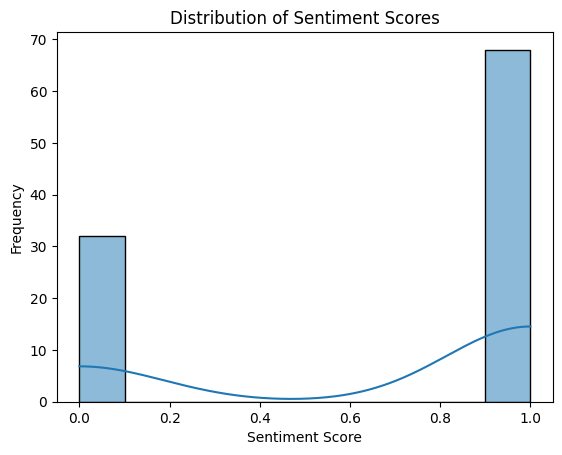

In [19]:
# Import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Example of exploratory data analysis (EDA)
# Assuming 'processed_data' is already available from previous steps
# Example: Distribution of sentiment scores
sentiment_scores = df['value'].tolist()
sns.histplot(sentiment_scores, bins=10, kde=True)
plt.title('Distribution of Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()




In [20]:
!pip install wordcloud

In [21]:
from wordcloud import WordCloud, STOPWORDS

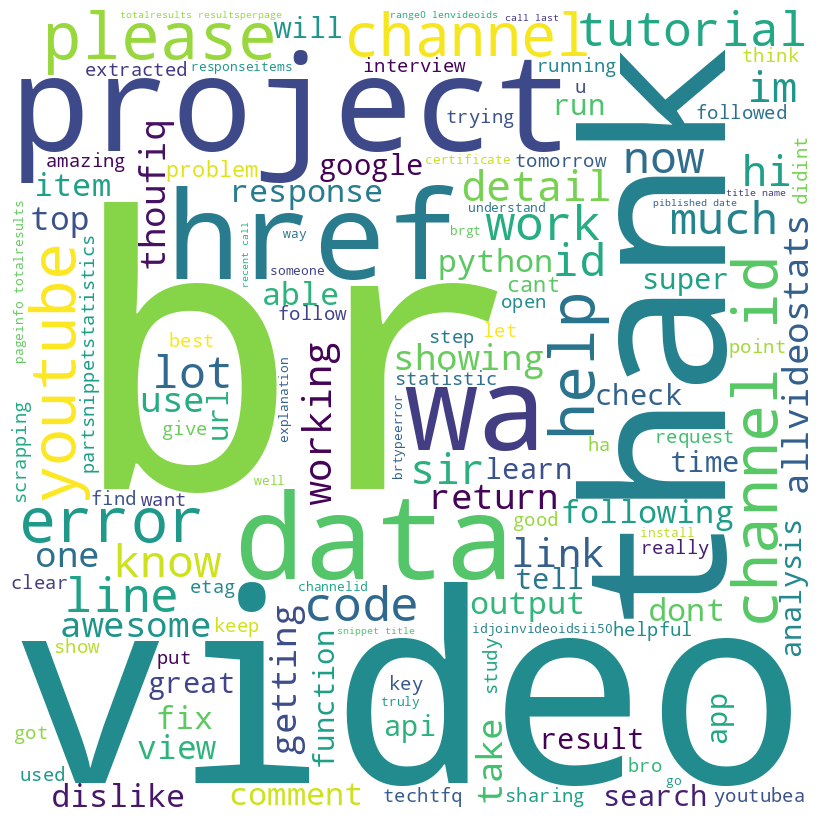

In [22]:

df = pd.read_csv("output.csv", encoding ="latin-1")

comment_words = ''
stopwords = set(STOPWORDS)

# iterate through the csv file
for val in df.text:

    # typecaste each val to string
    val = str(val)

    # split the value
    tokens = val.split()

    # Converts each token into lowercase
    for i in range(len(tokens)):
        tokens[i] = tokens[i].lower()

    comment_words += " ".join(tokens)+" "

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(comment_words)

# plot the WordCloud image
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)


started training the model

In [23]:
x = df[ 'text']
y = df['value']

In [24]:
from sklearn.model_selection import train_test_split
x_train , x_test, y_train , y_test = train_test_split(x,y,test_size= 0.3 , random_state = 0)

In [25]:
from sklearn.preprocessing import LabelEncoder
labelencoder_x = LabelEncoder()
labelencoder_y = LabelEncoder()
x_train= labelencoder_x.fit_transform(x_train)
x_test= labelencoder_x.fit_transform(x_test)
y_train= labelencoder_y.fit_transform(y_train)
y_test= labelencoder_y.fit_transform(y_test)

In [26]:
from sklearn.naive_bayes import GaussianNB
NBClassifier = GaussianNB()
x_train_reshaped = x_train.reshape(-1, 1)  # Reshape to a column vector
NBClassifier.fit(x_train_reshaped, y_train)


GaussianNB()

In [27]:
y_pred = NBClassifier.predict(x_test.reshape(-1, 1))
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1])

In [28]:
from sklearn import metrics
print("the accuracy of decision tree is : ", metrics.accuracy_score(y_pred , y_test))


the accuracy of decision tree is :  0.7


In [32]:
# How to save model
import pickle as pkl
file = open("model1.pkl", "wb")
pkl.dump(NBClassifier, file )  # Swap the arguments here
file.close()

In [33]:
from sklearn import svm
# Reshape x_train to be a 2D array
x_train_reshaped = x_train.reshape(-1, 1)

svc = svm.SVC(kernel='linear', C=1, probability=True,decision_function_shape='ovo').fit(x_train_reshaped, y_train)

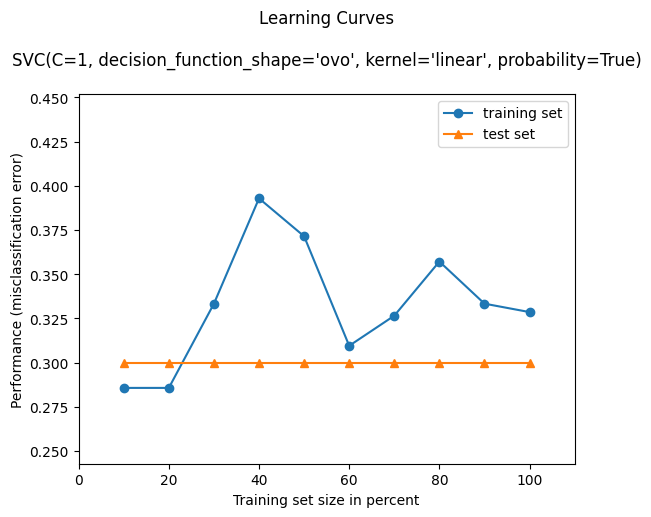

In [34]:
from mlxtend.plotting import plot_learning_curves
x_train_re = x_train.reshape(-1, 1)
x_test_re = x_test.reshape(-1, 1)
plot_learning_curves(x_train_re,y_train,x_test_re,y_test,svc)
plt.show()


prediction = svc.predict_proba(x_test_re)
prediction_int = prediction[:,1] >= 0.3
prediction_int = prediction_int.astype(int)



	Total Predicted Positive Comments :  30

	TOTAL Predicted Negative Comments :  0


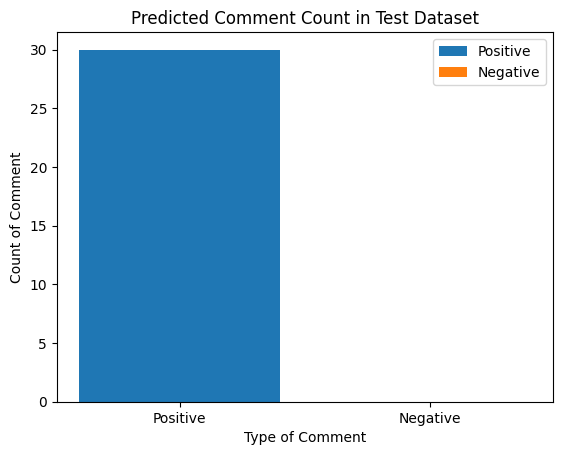

In [35]:
positive_comments= []
negative_comments = []

for i in prediction_int:
        if i == 0:
            negative_comments.append(i)
        else:
            positive_comments.append(i)



print("\tTotal Predicted Positive Comments : ",len(positive_comments))
print("\n\tTOTAL Predicted Negative Comments : ",len(negative_comments))



plt.bar(["Positive"],[len(positive_comments)],label = "Positive")
plt.bar(["Negative"],[len(negative_comments)],label = "Negative")
plt.legend()
plt.xlabel('Type of Comment')
plt.ylabel('Count of Comment')
plt.title('Predicted Comment Count in Test Dataset')

plt.show()


In [36]:
# How to save model
import pickle as pkl
file = open("model.pkl", "wb")
pkl.dump(svc , file)  # Swap the arguments here
file.close()